In [1]:
# Import necessary modules
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.circuit.library import CXGate
from qiskit_ibm_provider import IBMProvider
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import CouplingMap
from qiskit.circuit.library import C4XGate
from qiskit_ibm_runtime.fake_provider import FakeCambridge

import time
import os
 
# service = QiskitRuntimeService(channel="ibm_quantum", token="71312790a9405e5c50790a7928a71fa4afb8271d5b1c54a1fc092fc3e9afe355ad29bd206edd926f3cc6f57bd59f7bc486c8fb372a3f5e3457b22d43f45ce1c0")
# # Set the API key as an environment variable

# # Initialize the Qiskit Runtime Service

# # Specify the backend
# backend_name = 'ibm_kyiv'
backend = FakeCambridge()

# Example quantum circuit
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
cal_qc = QuantumCircuit(qreg_q, creg_c)
linear_coupling_map = CouplingMap([(0, 1), (1, 2), (2, 3), (3, 4)])

# Adding CX gates to the circuit
# cal_qc.cx(qreg_q[1], qreg_q[2])
# cal_qc.cx(qreg_q[1], qreg_q[4])
# cal_qc.cx(qreg_q[2], qreg_q[3])
# cal_qc.cx(qreg_q[5], qreg_q[4])
# cal_qc.cx(qreg_q[5], qreg_q[0])
# cal_qc.cx(qreg_q[6], qreg_q[0])
cal_qc.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
cal_qc.ccx(qreg_q[0], qreg_q[1], qreg_q[3])
cal_qc.x(qreg_q[1])
cal_qc.x(qreg_q[2])
cal_qc.ccx(qreg_q[1], qreg_q[2], qreg_q[4])
cal_qc.x(qreg_q[0])
cal_qc.cx(qreg_q[0], qreg_q[4])



# Transpile the circuit for the chosen backend
compiled_cal_qc_kyiv = transpile(cal_qc, backend=backend, coupling_map=linear_coupling_map,seed_transpiler=42)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\2604676901.py:4: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\2604676901.py:20: DeprecationWarning: V1 fake backends are deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use V2 fake backends instead.
  backend = FakeCambridge()
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\2604676901.py:48: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  co

In [2]:
mod5_4 = QuantumCircuit(qreg_q, creg_c)
t_coupling_map = CouplingMap([(11, 17), (10,11), (11, 12),(23,17)])

mod5_4.cx(qreg_q[0], qreg_q[2])
mod5_4.cx(qreg_q[1], qreg_q[3])
mod5_4.ccx(qreg_q[2], qreg_q[3], qreg_q[4])
mod5_4.cx(qreg_q[2], qreg_q[3])
mod5_4.cx(qreg_q[3], qreg_q[4])


# Compile the original circuit
compiled_mod5_4 = transpile(mod5_4, backend, coupling_map=t_coupling_map,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\859628387.py:12: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_mod5_4 = transpile(mod5_4, backend, coupling_map=t_coupling_map,seed_transpiler=42)


In [3]:
from qiskit import QuantumCircuit
import numpy as np
def qft_dagger(n):
    """Creates the inverse QFT on n qubits."""
    qc = QuantumCircuit(n)
    # Apply Hadamard gate to each qubit
    for qubit in range(n-1, -1, -1):
        qc.h(qubit)
        for j in range(qubit):
            qc.cp(-np.pi/2**(qubit-j), j, qubit)
    return qc

n_qubits = 5
qft_circuit = qft_dagger(n_qubits)
qft_circuit.draw('mpl')
t_10 = CouplingMap([(14,15),(15,18),(18,27),(27,26)])
compiled_qft = transpile(qft_circuit, backend, coupling_map=t_10,seed_transpiler=42)



C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\3275495384.py:17: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_qft = transpile(qft_circuit, backend, coupling_map=t_10,seed_transpiler=42)


In [4]:
from qiskit.circuit.library import GroverOperator

n_qubits = 5
oracle = QuantumCircuit(n_qubits)
oracle.cz(0, 1)  # Define an oracle for example purposes
grover = GroverOperator(oracle)

grover_circuit = QuantumCircuit(n_qubits)
grover_circuit.h(range(n_qubits))  # Apply Hadamard
grover_circuit.append(grover, range(n_qubits))  # Apply Grover iteration
grover_circuit.measure_all()

grover_circuit.draw('mpl')
grover_cm = CouplingMap([(8,7),(16,7),(19,16),(20,19)])
compiled_grover = transpile(grover, backend=backend, coupling_map=grover_cm,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\1294039247.py:15: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_grover = transpile(grover, backend=backend, coupling_map=grover_cm,seed_transpiler=42)


In [5]:
n_qubits = 5
ghz_circuit = QuantumCircuit(n_qubits)
ghz_circuit.h(0)  # Apply Hadamard on the first qubit
for qubit in range(n_qubits-1):
    ghz_circuit.cx(qubit, qubit + 1)  # Create entanglement

ghz_circuit.measure_all()

ghz_circuit.draw('mpl')

ghz_cm= CouplingMap([(17,23),(23,24),(24,25),(25,26)])
compiled_ghz = transpile(ghz_circuit, backend=backend, coupling_map=ghz_cm,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\49071859.py:12: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_ghz = transpile(ghz_circuit, backend=backend, coupling_map=ghz_cm,seed_transpiler=42)


In [6]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
one23 = QuantumCircuit(qreg_q, creg_c)

one23.cx(qreg_q[3], qreg_q[1])
one23.cx(qreg_q[2], qreg_q[0])
one23.ccx(qreg_q[3], qreg_q[4], qreg_q[2])
one23.ccx(qreg_q[2], qreg_q[0], qreg_q[4])
one23.cx(qreg_q[4], qreg_q[3])
one23.ccx(qreg_q[1], qreg_q[3], qreg_q[4])
one23.cx(qreg_q[3], qreg_q[2])
one23.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
one23_cm= CouplingMap([(13,14),(14,15),(15,18),(18,27)])
compiled_one23 = transpile(one23, backend=backend, coupling_map=one23_cm,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\63539945.py:14: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_one23 = transpile(one23, backend=backend, coupling_map=one23_cm,seed_transpiler=42)


In [7]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(1, 'c')
fourgt4 = QuantumCircuit(qreg_q, creg_c)
#backend = Aer.get_backend('qasm_simulator')
from qiskit.circuit.library import C3XGate, C4XGate

fourgt4.cx(qreg_q[4], qreg_q[1])
fourgt4.ccx(qreg_q[2], qreg_q[4], qreg_q[0])
fourgt4.x(qreg_q[0])

fourgt4.cx(qreg_q[1],qreg_q[2])
fourgt4.x(qreg_q[0])

fourgt4.append(C3XGate(), [qreg_q[0], qreg_q[2], qreg_q[3], qreg_q[4]])

fourgt4.x(qreg_q[0])
fourgt4.cx(qreg_q[1],qreg_q[2])

fourgt4.ccx(qreg_q[0], qreg_q[1], qreg_q[4])
fourgt4.append(C4XGate(), [qreg_q[1], qreg_q[0], qreg_q[2], qreg_q[3], qreg_q[4]])
fourgt4_cm= CouplingMap([(4,6),(6,13),(12,13),(14,13)])
compiled_4gt4=transpile(fourgt4, backend=backend, coupling_map=fourgt4_cm,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\3274481816.py:22: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_4gt4=transpile(fourgt4, backend=backend, coupling_map=fourgt4_cm,seed_transpiler=42)


In [8]:
qreg_q = QuantumRegister(5, 'q')
creg_c = ClassicalRegister(4, 'c')
fourmod7 = QuantumCircuit(qreg_q, creg_c)

fourmod7.x(qreg_q[0])
fourmod7.ccx(qreg_q[4], qreg_q[1], qreg_q[0])
fourmod7.cx(qreg_q[1], qreg_q[4])
fourmod7.cx(qreg_q[1], qreg_q[4])
fourmod7.append(C3XGate(), [qreg_q[3], qreg_q[4], qreg_q[2], qreg_q[0]])
fourmod7.append(C3XGate(), [qreg_q[3], qreg_q[0], qreg_q[2], qreg_q[4]])
fourmod7.ccx(qreg_q[0], qreg_q[2], qreg_q[3])
fourmod7_cm= CouplingMap([(0,5),(5,9),(8,9),(9,10)])
compiled_4mod7=transpile(fourmod7, backend=backend, coupling_map=fourmod7_cm,seed_transpiler=42)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\2577216945.py:13: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_4mod7=transpile(fourmod7, backend=backend, coupling_map=fourmod7_cm,seed_transpiler=42)


In [9]:
fourgt11 = QuantumCircuit(qreg_q, creg_c)

fourgt11.cx(qreg_q[2], qreg_q[1])
fourgt11.cx(qreg_q[1], qreg_q[2])
fourgt11.cx(qreg_q[3], qreg_q[2])
fourgt11.cx(qreg_q[2], qreg_q[3])
fourgt11.cx(qreg_q[4], qreg_q[3])
fourgt11.cx(qreg_q[3], qreg_q[4])
fourgt11.ccx(qreg_q[1], qreg_q[4], qreg_q[0])
fourgt11.cx(qreg_q[4], qreg_q[3])
fourgt11.cx(qreg_q[4], qreg_q[2])
fourgt11.cx(qreg_q[4], qreg_q[1])
fourgt11.cx(qreg_q[0], qreg_q[4])
fourgt11.cx(qreg_q[4], qreg_q[0])
fourgt11_cm= CouplingMap([(11,17),(17,23),(23,22),(23,24)])
compiled_4gt11=transpile(fourmod7, backend=backend, coupling_map=fourgt11_cm,seed_transpiler=42)

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\2478346106.py:16: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_4gt11=transpile(fourmod7, backend=backend, coupling_map=fourgt11_cm,seed_transpiler=42)


In [10]:
mod5mils = QuantumCircuit(qreg_q, creg_c)

mod5mils.x(qreg_q[3])
mod5mils.cx(qreg_q[1], qreg_q[3])
mod5mils.ccx(qreg_q[3], qreg_q[2], qreg_q[4])
mod5mils.ccx(qreg_q[3], qreg_q[0], qreg_q[4])
mod5mils.cx(qreg_q[3], qreg_q[4])
mod5mils_cm=CouplingMap([(21,22),(17,23),(23,22),(20,21)])
compiled_mod5mils= transpile(mod5mils, backend=backend, coupling_map=mod5mils_cm,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\283489536.py:9: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_mod5mils= transpile(mod5mils, backend=backend, coupling_map=mod5mils_cm,seed_transpiler=42)


In [11]:
fourgt12 = QuantumCircuit(qreg_q, creg_c)

fourgt12.ccx(qreg_q[1], qreg_q[2], qreg_q[3])
fourgt12.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
fourgt12.cx(qreg_q[4], qreg_q[0])
fourgt12.cx(qreg_q[0], qreg_q[4])
fourgt12.append(C4XGate(), [qreg_q[3], qreg_q[2], qreg_q[0], qreg_q[1], qreg_q[4]])
fourgt12_cm=CouplingMap([(15,18),(18,27),(27,26),(26,25)])
compiled_4gt12= transpile(fourgt12, backend=backend, coupling_map=fourgt12_cm,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4142279597.py:9: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_4gt12= transpile(fourgt12, backend=backend, coupling_map=fourgt12_cm,seed_transpiler=42)


In [12]:
fourgt13 = QuantumCircuit(qreg_q, creg_c)

fourgt13.cx(qreg_q[4], qreg_q[0])
fourgt13.append(C3XGate(), [qreg_q[3], qreg_q[2], qreg_q[1], qreg_q[0]])
fourgt13.cx(qreg_q[0], qreg_q[4])
fourgt13.draw(output='mpl')
fourgt13_cm=CouplingMap([(0,5),(5,9),(9,10),(10,11)])
compiled_4gt13= transpile(fourgt13, backend=backend, coupling_map=fourgt13_cm,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\1061493612.py:8: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_4gt13= transpile(fourgt13, backend=backend, coupling_map=fourgt13_cm,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:5: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_cal_qc_t = transpile(cal_qc, backend=backend, coupling_map=t_coupling_map,seed_transpiler=42)


{(11, 12), (17, 23), (10, 11), (11, 17)}


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if len(instruction[1]) == 2:
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:79: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  qubits = [qarg for qarg in instruction[1]]


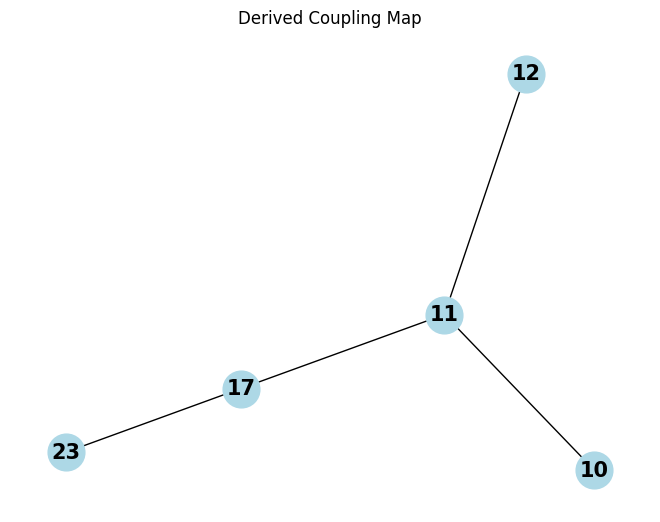

0.22438740730285645
{(2, 3), (1, 2), (3, 4), (0, 1)}


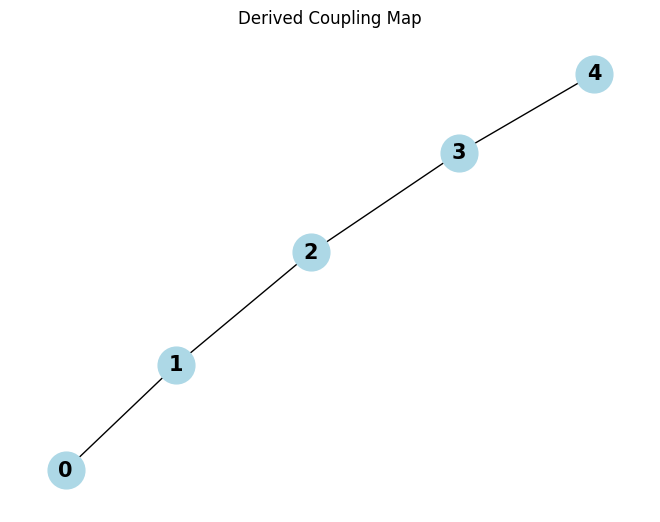

0.11831498146057129
{(26, 27), (18, 27), (15, 18), (14, 15)}


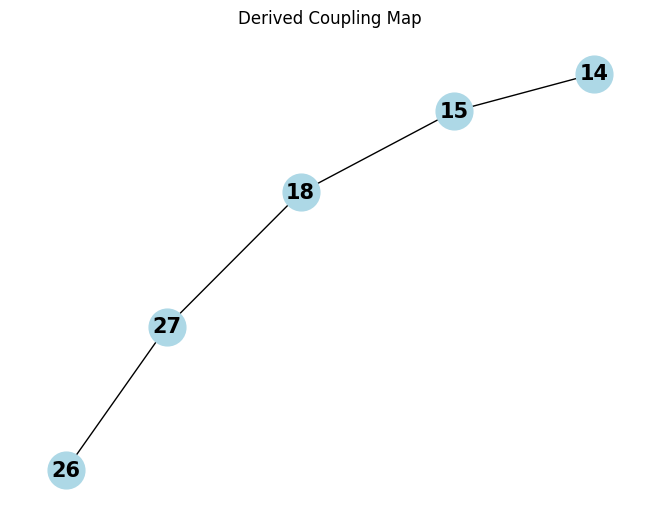

{(7, 16), (16, 19), (19, 20), (7, 8)}


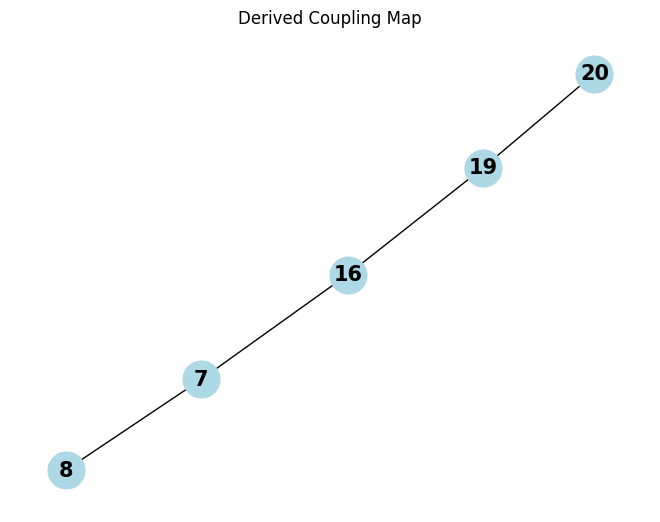

{(15, 18), (13, 14), (14, 15), (18, 27)}


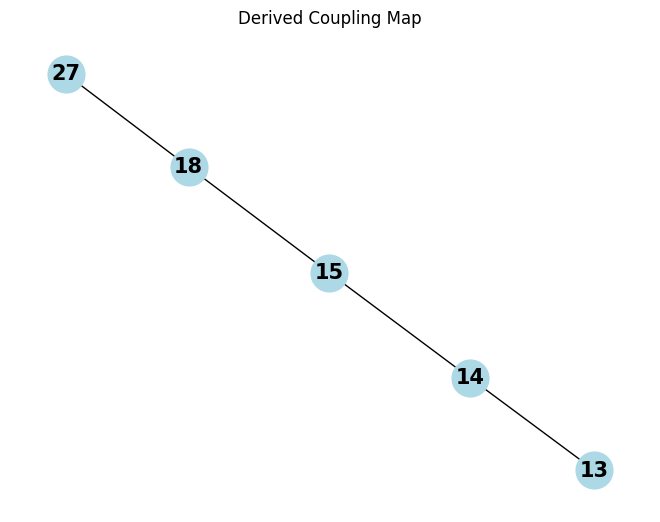

{(24, 25), (17, 23), (23, 24), (25, 26)}


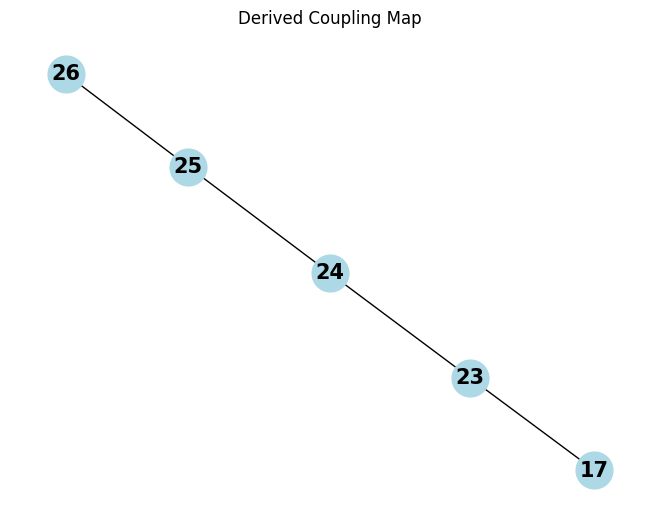

{(13, 14), (6, 13), (4, 6), (12, 13)}


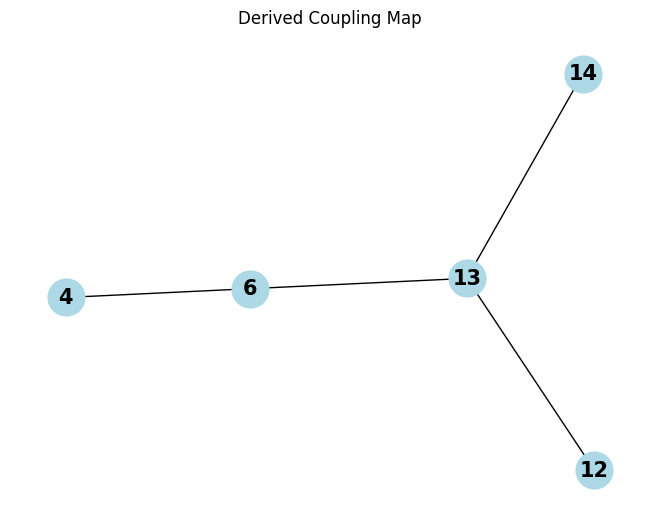

{(9, 10), (5, 9), (8, 9), (0, 5)}


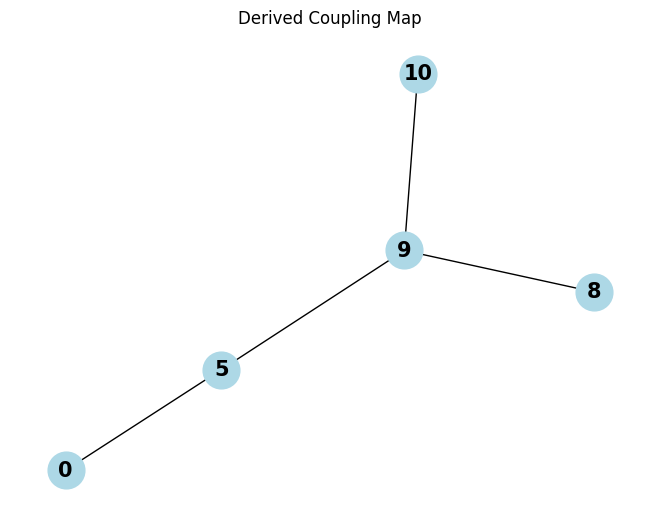

{(22, 23), (17, 23), (23, 24), (11, 17)}


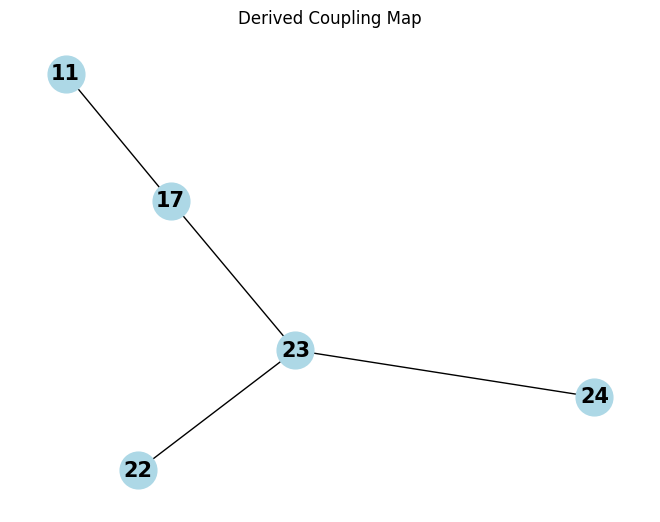

{(26, 27), (18, 27), (15, 18), (25, 26)}


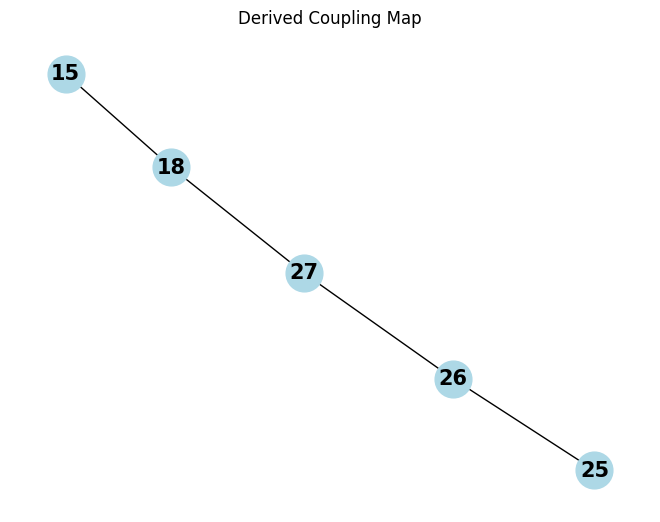

{(9, 10), (5, 9), (10, 11), (0, 5)}


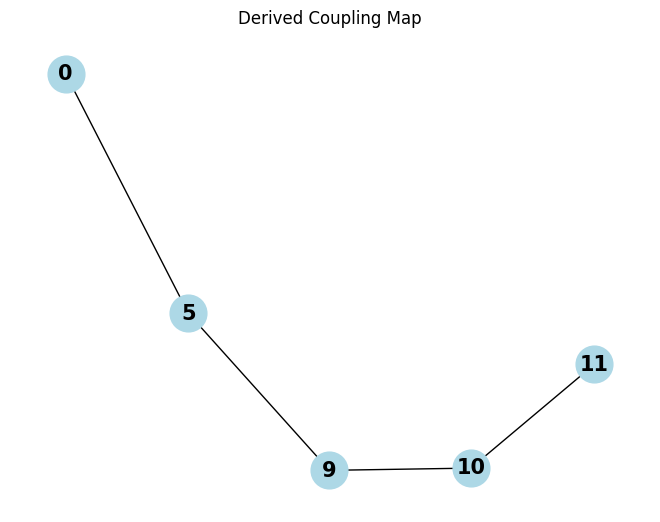

{(17, 23), (21, 22), (20, 21), (22, 23)}


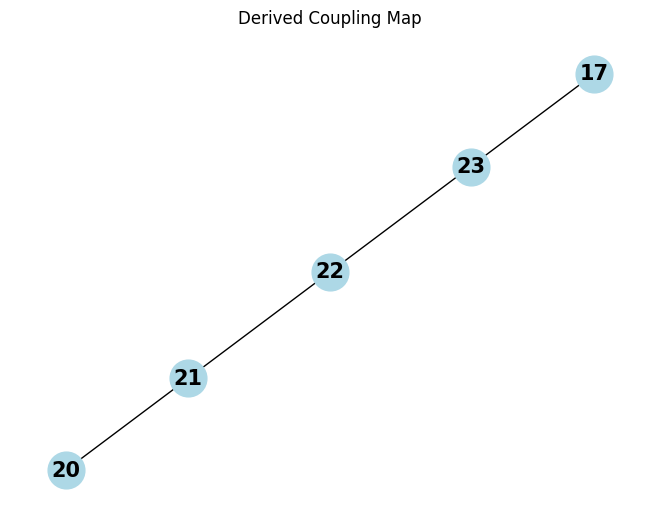

In [13]:
from collections import Counter
import numpy as np
from qiskit.circuit.library import SwapGate, CXGate, RZZGate, RXXGate, RYYGate, iSwapGate
from qiskit.quantum_info import Operator
compiled_cal_qc_t = transpile(cal_qc, backend=backend, coupling_map=t_coupling_map,seed_transpiler=42)
def is_swap_gate(instruction_tuple):
    """Check if the given instruction represents a SWAP gate or equivalent sequence."""
    instruction = instruction_tuple[0]  # Unpack the instruction from the tuple

    # Direct SWAP gate
    if isinstance(instruction, SwapGate):
        return True
    
    # Named SWAP gate
    if instruction.name.lower() == 'swap':
        return True
    
    # Check for equivalent operations using matrix comparison
    if instruction.num_qubits == 2:
        swap_op = Operator(SwapGate())
        instr_op = Operator(instruction)
        if np.allclose(instr_op.data, swap_op.data, atol=1e-10):
            return True
    
    # Check for common SWAP implementations
    if isinstance(instruction, CXGate):
        # CNOT-based SWAP (3 CNOTs)
        if hasattr(instruction, 'definition') and instruction.definition:
            data = instruction.definition.data
            if len(data) == 3:
                cx1, cx2, cx3 = data[0][0], data[1][0], data[2][0]
                if (isinstance(cx1, CXGate) and isinstance(cx2, CXGate) and isinstance(cx3, CXGate) and
                    cx1.qargs[0] == cx2.qargs[1] and cx1.qargs[1] == cx3.qargs[1] and
                    cx2.qargs[0] == cx3.qargs[0]):
                    return True
    
    # iSWAP-based SWAP
    if isinstance(instruction, iSwapGate):
        if hasattr(instruction, 'definition') and instruction.definition:
            data = instruction.definition.data
            if len(data) == 2:
                iswap, s = data[0][0], data[1][0]
                if isinstance(iswap, iSwapGate) and s.name == 's' and s.qargs == iswap.qargs:
                    return True
    
    # RZZ, RXX, RYY-based SWAP
    if isinstance(instruction, (RZZGate, RXXGate, RYYGate)):
        if hasattr(instruction, 'definition') and instruction.definition:
            data = instruction.definition.data
            if len(data) == 3:
                rzz, rxx, ryy = data[0][0], data[1][0], data[2][0]
                if (isinstance(rzz, RZZGate) and isinstance(rxx, RXXGate) and isinstance(ryy, RYYGate) and
                    rzz.params[0] == rxx.params[0] == ryy.params[0] == np.pi/2 and
                    rzz.qargs == rxx.qargs == ryy.qargs):
                    return True
    
    return False

from qiskit import QuantumCircuit
from qiskit.circuit.library.standard_gates import SwapGate
# Updated function to derive coupling map
# Updated function to derive coupling map
# Updated function to derive coupling map
def derive_coupling_map_from_circuit(transpiled_circuit):
    derived_coupling_map = set()  # Use a set to avoid duplicate entries

    # Initialize the swap history for each qubit in the circuit
    qubit_swap_history = {qubit: False for qubit in transpiled_circuit.qubits}

    for instruction in transpiled_circuit.data:
        if instruction[0].name == 'swap':
            # If the instruction is a SWAP gate, mark the qubits as involved in a swap
            for qarg in instruction[1]:
                qubit_swap_history[qarg] = True
            continue  # Move to the next instruction

        if len(instruction[1]) == 2:
            # Directly use the qubit objects
            qubits = [qarg for qarg in instruction[1]]

            # Check if any of the qubits were involved in a SWAP
            if not any(qubit_swap_history[qubit] for qubit in qubits):
                # If neither qubit has been swapped, add the connection
                qubit_indices = [transpiled_circuit.find_bit(qarg).index for qarg in qubits]
                derived_coupling_map.add(tuple(sorted(qubit_indices)))

    return derived_coupling_map

# Use the updated function to derive the coupling map
import matplotlib.pyplot as plt
import networkx as nx

def plot_coupling_map(coupling_map):
    # Create a graph from the coupling map
    G = nx.Graph()
    G.add_edges_from(coupling_map)
    
    # Draw the graph using networkx
    pos = nx.spring_layout(G)  # Position nodes using a layout algorithm
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=15, font_weight='bold')
    plt.title("Derived Coupling Map")
    plt.show()

# Assuming derived_map is the derived coupling map from your code

# Plot the derived coupling map
start_time = time.time()
derived_map_mod5= derive_coupling_map_from_circuit(compiled_mod5_4)
print(derived_map_mod5)
plot_coupling_map(derived_map_mod5)
end_time = time.time()
execution_time = end_time- start_time
print(execution_time)

start_time = time.time()
derived_map_1bit_adder = derive_coupling_map_from_circuit(compiled_cal_qc_kyiv)
print(derived_map_1bit_adder)
plot_coupling_map(derived_map_1bit_adder)
end_time = time.time()
execution_time = end_time- start_time
print(execution_time)

derived_map_qft = derive_coupling_map_from_circuit(compiled_qft)
print(derived_map_qft)
plot_coupling_map(derived_map_qft)

derived_map_grover = derive_coupling_map_from_circuit(compiled_grover)
print(derived_map_grover)
plot_coupling_map(derived_map_grover)

derived_map_one23 = derive_coupling_map_from_circuit(compiled_one23)
print(derived_map_one23)
plot_coupling_map(derived_map_one23)

derived_map_ghz = derive_coupling_map_from_circuit(compiled_ghz)
print(derived_map_ghz)
plot_coupling_map(derived_map_ghz)

derived_map_4gt4 = derive_coupling_map_from_circuit(compiled_4gt4)
print(derived_map_4gt4)
plot_coupling_map(derived_map_4gt4)

derived_map_4mod7 = derive_coupling_map_from_circuit(compiled_4mod7)
print(derived_map_4mod7)
plot_coupling_map(derived_map_4mod7)

derived_map_4gt11 = derive_coupling_map_from_circuit(compiled_4gt11)
print(derived_map_4gt11)
plot_coupling_map(derived_map_4gt11)

derived_map_4gt12 = derive_coupling_map_from_circuit(compiled_4gt12)
print(derived_map_4gt12)
plot_coupling_map(derived_map_4gt12)

derived_map_4gt13 = derive_coupling_map_from_circuit(compiled_4gt13)
print(derived_map_4gt13)
plot_coupling_map(derived_map_4gt13)

derived_map_mod5mils = derive_coupling_map_from_circuit(compiled_mod5mils)
print(derived_map_mod5mils)
plot_coupling_map(derived_map_mod5mils)



In [14]:
n_qubits = 10
qft_circuit = qft_dagger(n_qubits)
qft_circuit.draw('mpl')
t_10 = CouplingMap([(7,8),(8,9),(9,10),(10,11),(11,12),(12,13),(13,14),(14,15),(15,18)])
compiled_qft_new = transpile(qft_circuit, backend, coupling_map=t_10,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\3944096322.py:5: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_qft_new = transpile(qft_circuit, backend, coupling_map=t_10,seed_transpiler=42)


In [15]:
n_qubits = 10
ghz_circuit_new = QuantumCircuit(n_qubits)
ghz_circuit_new.h(0)  # Apply Hadamard on the first qubit
for qubit in range(n_qubits-1):
    ghz_circuit_new.cx(qubit, qubit + 1)  # Create entanglement

ghz_circuit_new.measure_all()

ghz_circuit_new.draw('mpl')

ghz_cm_new= CouplingMap([(19,20),(20,21),(21,22),(22,23),(23,24),(24,25),(25,26),(27,18),(26,27)])
compiled_ghz_new = transpile(ghz_circuit_new, backend=backend, coupling_map=ghz_cm_new,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\1045952899.py:12: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_ghz_new = transpile(ghz_circuit_new, backend=backend, coupling_map=ghz_cm_new,seed_transpiler=42)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\2072480544.py:9: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_grover_new = transpile(grover_circuit, backend=backend, coupling_map=grover_new,seed_transpiler=42)


{(9, 10), (13, 14), (10, 11), (12, 13), (11, 12), (15, 18), (8, 9), (14, 15), (7, 8)}


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if len(instruction[1]) == 2:
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:79: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  qubits = [qarg for qarg in instruction[1]]


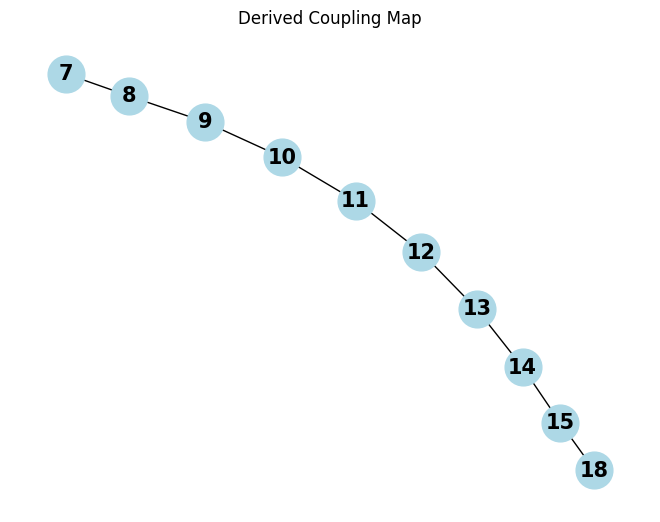

{(0, 1), (13, 14), (1, 2), (3, 4), (4, 6), (12, 13), (2, 3), (6, 13), (14, 15)}


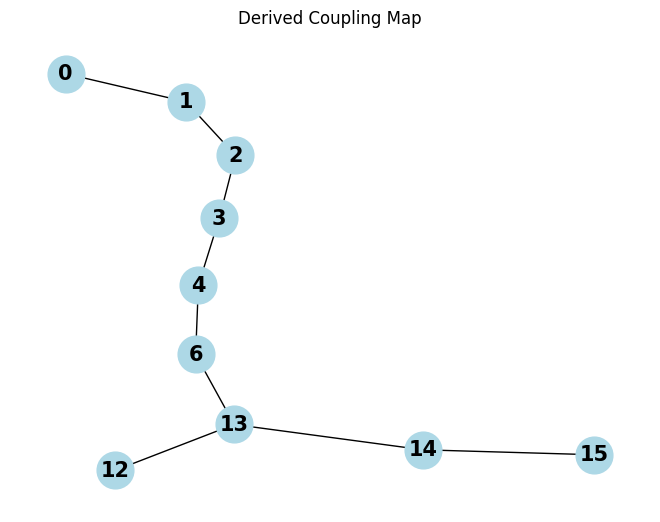

{(18, 27), (26, 27), (19, 20), (21, 22), (22, 23), (24, 25), (23, 24), (25, 26), (20, 21)}


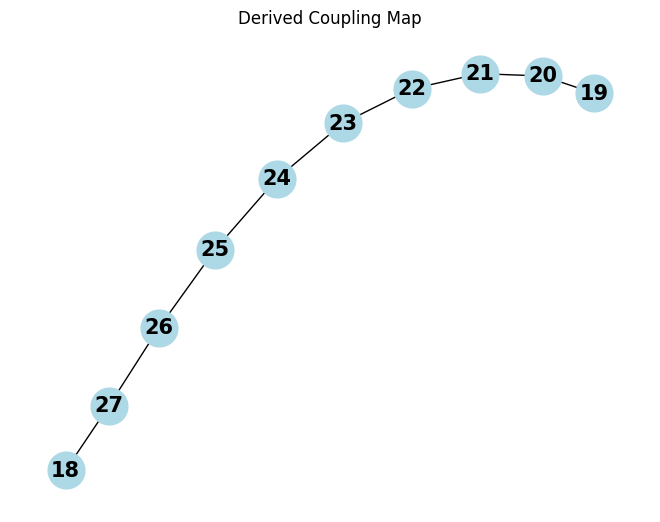

In [16]:
oracle = QuantumCircuit(n_qubits)
oracle.cz(0, 1)  # Define an oracle for example purposes
grover = GroverOperator(oracle)

grover_circuit = QuantumCircuit(n_qubits)
grover_circuit.h(range(n_qubits))  # Apply Hadamard
grover_circuit.append(grover, range(n_qubits))  # Apply Grover iteration
grover_new= CouplingMap([(0,1),(2,1),(2,3),(3,4),(4,6),(6,13),(12,13),(13,14),(14,15)])
compiled_grover_new = transpile(grover_circuit, backend=backend, coupling_map=grover_new,seed_transpiler=42)

derived_map_qft_new = derive_coupling_map_from_circuit(compiled_qft_new)
print(derived_map_qft_new)
plot_coupling_map(derived_map_qft_new)

derived_map_grover_new = derive_coupling_map_from_circuit(compiled_grover_new)
print(derived_map_grover_new)
plot_coupling_map(derived_map_grover_new)

derived_map_ghz_new = derive_coupling_map_from_circuit(compiled_ghz_new)
print(derived_map_ghz_new)
plot_coupling_map(derived_map_ghz_new)


{(0, 1), (9, 10), (1, 2), (3, 4), (2, 3), (8, 9), (0, 5), (5, 9), (7, 8)}


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\3637631616.py:6: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_rc = transpile(random_circ, backend=backend, coupling_map=rc,seed_transpiler=42)
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `q

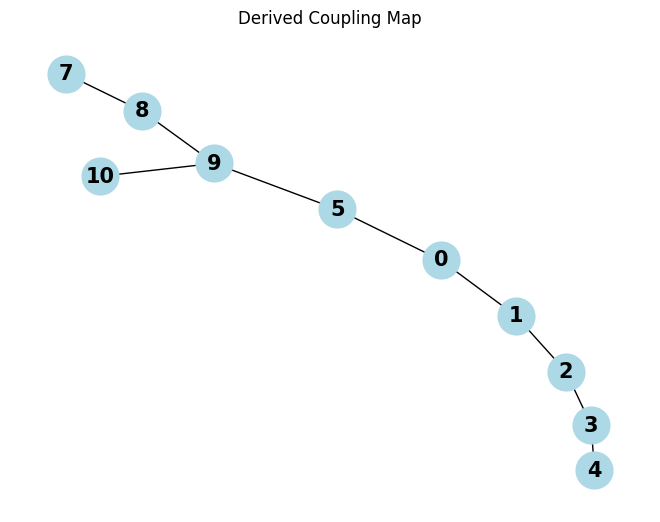

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\3637631616.py:14: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_rc_2 = transpile(random_circ_2, backend=backend, coupling_map=rc_2,seed_transpiler=42)
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operati

{(17, 23), (10, 11), (12, 13), (22, 23), (11, 12), (24, 25), (23, 24), (25, 26), (11, 17)}


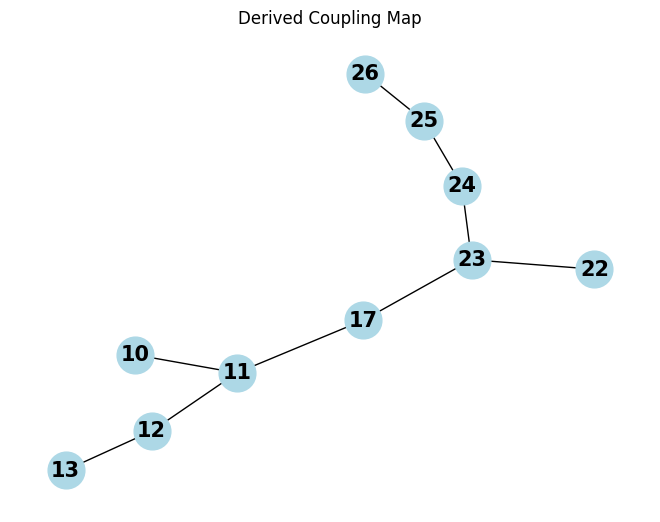

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\3637631616.py:22: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_rc_3 = transpile(random_circ_3, backend=backend, coupling_map=rc_3,seed_transpiler=42)
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operati

{(10, 11), (21, 22)}


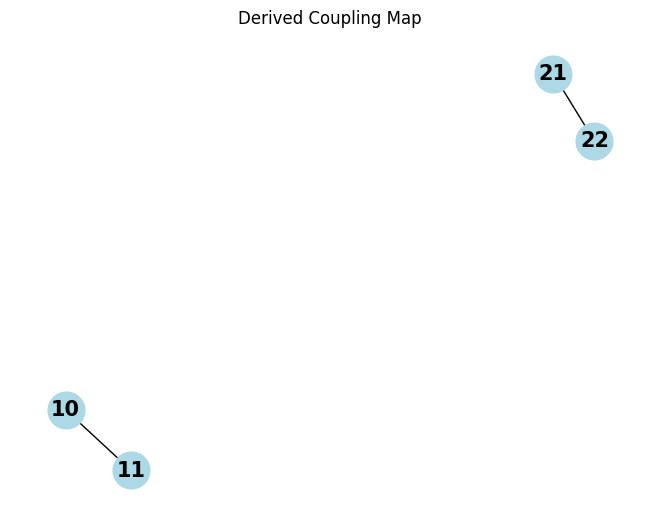

In [17]:
from qiskit.circuit.random import random_circuit

# Generate a random 10-qubit quantum circuit with 20 layers of gates
random_circ = random_circuit(num_qubits=10, depth=5, max_operands=2)
rc= CouplingMap([(0,1),(2,1),(2,3),(3,4),(0,5),(5,9),(7,8),(8,9),(9,10)])
compiled_rc = transpile(random_circ, backend=backend, coupling_map=rc,seed_transpiler=42)

derived_map_rc = derive_coupling_map_from_circuit(compiled_rc)
print(derived_map_rc)
plot_coupling_map(derived_map_rc)

random_circ_2 = random_circuit(num_qubits=10, depth=5, max_operands=2)
rc_2= CouplingMap([(11,10),(12,13),(12,11),(11,17),(17,23),(22,23),(23,24),(24,25),(25,26)])
compiled_rc_2 = transpile(random_circ_2, backend=backend, coupling_map=rc_2,seed_transpiler=42)

derived_map_rc_2 = derive_coupling_map_from_circuit(compiled_rc_2)
print(derived_map_rc_2)
plot_coupling_map(derived_map_rc_2)

random_circ_3 = random_circuit(num_qubits=10, depth=5, max_operands=2)
rc_3= CouplingMap([(7,8),(8,9),(9,10),(11,10),(7,16),(16,19),(19,20),(20,21),(22,21)])
compiled_rc_3 = transpile(random_circ_3, backend=backend, coupling_map=rc_3,seed_transpiler=42)

derived_map_rc_3 = derive_coupling_map_from_circuit(compiled_rc_3)
print(derived_map_rc_3)
plot_coupling_map(derived_map_rc_3)


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\1909900459.py:13: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_rc_4 = transpile(grover_circuit, backend=backend, coupling_map=line_15,seed_transpiler=42)


{(9, 10), (10, 11), (16, 19), (19, 20), (7, 16), (21, 22), (22, 23), (24, 25), (8, 9), (0, 5), (5, 9), (23, 24), (7, 8), (20, 21)}


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if len(instruction[1]) == 2:
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:79: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  qubits = [qarg for qarg in instruction[1]]


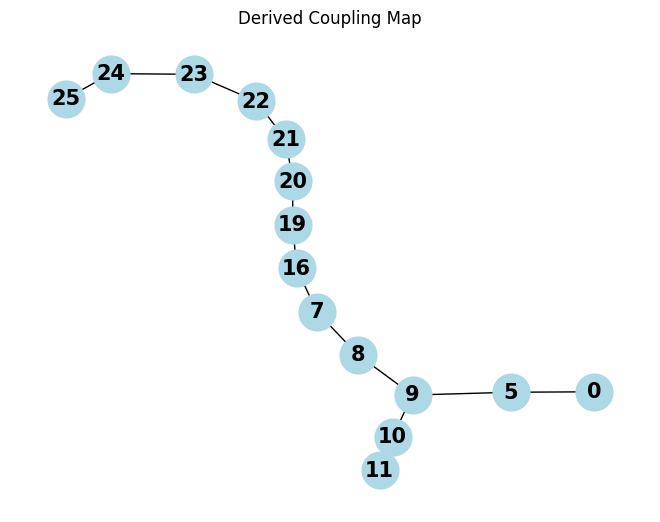

{(18, 27), (17, 23), (3, 4), (26, 27), (4, 6), (12, 13), (14, 15), (11, 12), (24, 25), (6, 13), (15, 18), (23, 24), (25, 26), (11, 17)}


C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\1909900459.py:29: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_rc_5 = transpile(ghz_circuit_new, backend=backend, coupling_map=t_15,seed_transpiler=42)
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `opera

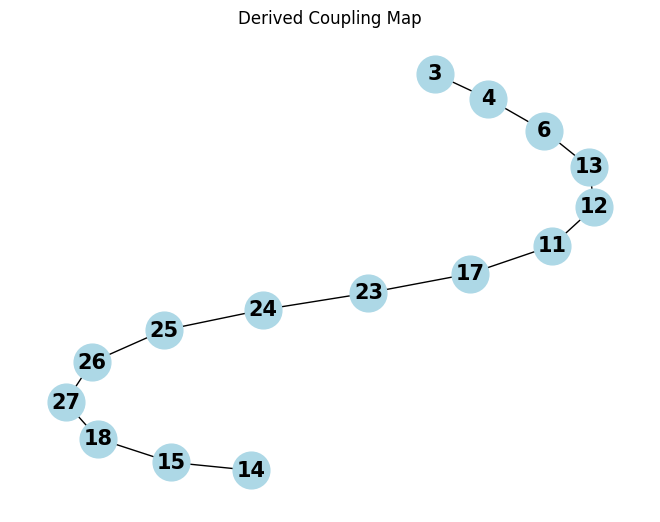

C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\1909900459.py:40: DeprecationWarning: The `transpile` function will stop supporting inputs of type `BackendV1` ( fake_cambridge ) in the `backend` parameter in a future release no earlier than 2.0. `BackendV1` is deprecated and implementations should move to `BackendV2`.
  compiled_rc_6 = transpile(qft_circuit, backend=backend, coupling_map=cm_15,seed_transpiler=42)
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:71: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operation`, `qubits` and `clbits` named attributes.
  if instruction[0].name == 'swap':
C:\Users\Rupshali Roy\AppData\Local\Temp\ipykernel_18272\4010833524.py:77: DeprecationWarning: Treating CircuitInstruction as an iterable is deprecated legacy behavior since Qiskit 1.2, and will be removed in Qiskit 2.0. Instead, use the `operatio

{(0, 1), (18, 27), (13, 14), (1, 2), (23, 24), (3, 4), (26, 27), (4, 6), (15, 18), (2, 3), (6, 13), (24, 25), (14, 15), (25, 26)}


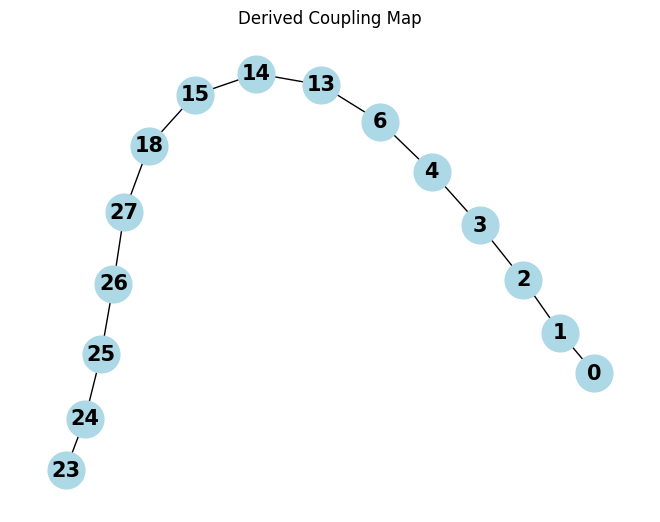

In [18]:
from qiskit.circuit.random import random_circuit
n_qubits=15
oracle = QuantumCircuit(n_qubits)
oracle.cz(0, 1)  # Define an oracle for example purposes
grover = GroverOperator(oracle)

grover_circuit = QuantumCircuit(n_qubits)
grover_circuit.h(range(n_qubits))  # Apply Hadamard
grover_circuit.append(grover, range(n_qubits))  # Apply Grover iteration

# Generate a random 10-qubit quantum circuit with 20 layers of gates
line_15 = CouplingMap([(0, 5), (5, 9), (9, 10), (10, 11),(9,8),(8,7),(16,7),(19,16),(20,19),(20,21),(21,22),(22,23),(23,24),(24,25)])
compiled_rc_4 = transpile(grover_circuit, backend=backend, coupling_map=line_15,seed_transpiler=42)

derived_map_rc_4 = derive_coupling_map_from_circuit(compiled_rc_4)
print(derived_map_rc_4)
plot_coupling_map(derived_map_rc_4)

n_qubits = 15
ghz_circuit_new = QuantumCircuit(n_qubits)
ghz_circuit_new.h(0)  # Apply Hadamard on the first qubit
for qubit in range(n_qubits-1):
    ghz_circuit_new.cx(qubit, qubit + 1)  # Create entanglement

ghz_circuit_new.measure_all()

ghz_circuit_new.draw('mpl')
t_15 = CouplingMap([(11,12),(12,13),(13,14) ,(14,15),(11,17),(17,23),(15,18),(18,27),(23,24),(24,25),(25,26),(26,27),(3,4),(4,6),(6,13)])
compiled_rc_5 = transpile(ghz_circuit_new, backend=backend, coupling_map=t_15,seed_transpiler=42)

derived_map_rc_5 = derive_coupling_map_from_circuit(compiled_rc_5)
print(derived_map_rc_5)
plot_coupling_map(derived_map_rc_5)


qft_circuit = qft_dagger(n_qubits)
cm_15 = CouplingMap([(0,1),(2,1),(2,3),(3,4),(4,6),(6,13),(13,14),(14,15),(15,18),(18,27),(27,26),(26,25),(25,24),(23,24)])
cm_15_2 = CouplingMap([(0,1),(2,1),(2,3),(3,4),(0,5),(5,9),(9,8),(8,7),(7,16),(16,19),(19,20),(21,22),(22,23)])

compiled_rc_6 = transpile(qft_circuit, backend=backend, coupling_map=cm_15,seed_transpiler=42)
# compiled_rc_7 = transpile(qft_circuit, backend=backend, coupling_map=t_15,seed_transpiler=42)

derived_map_rc_6= derive_coupling_map_from_circuit(compiled_rc_6)
print(derived_map_rc_6)
plot_coupling_map(derived_map_rc_6)





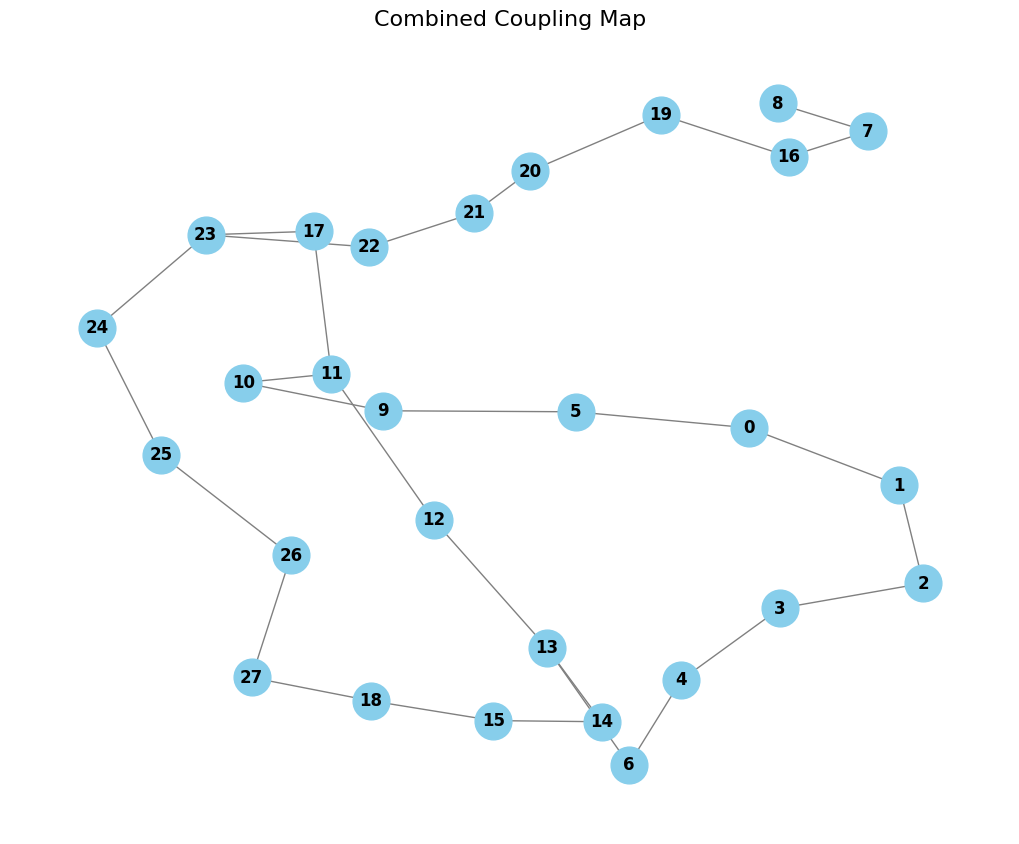

{(0, 1), (9, 10), (17, 23), (1, 2), (10, 11), (3, 4), (26, 27), (19, 20), (4, 6), (12, 13), (21, 22), (22, 23), (15, 18), (24, 25), (6, 13), (0, 5), (11, 17), (20, 21), (13, 14), (18, 27), (16, 19), (7, 16), (14, 15), (2, 3), (11, 12), (7, 8), (5, 9), (23, 24), (25, 26)}


In [74]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the derived coupling maps as lists of tuples (edges)
# Assuming derived_map_grover_l, derived_map_t_qft, derived_map_t_1bit, derived_map_1bit_adder are defined
# combined_coupling_map = derived_map_grover_new |derived_map_qft|derived_map_qft_new| derived_map_mod5|derived_map_rc_6|derived_map_4mod7|derived_map_4gt11|derived_map_grover_new|derived_map_rc_2|derived_map_4gt13| derived_map_grover|derived_map_1bit_adder|derived_map_one23|derived_map_4gt12|derived_map_4gt4
combined_coupling_map = derived_map_one23|derived_map_1bit_adder|derived_map_qft|derived_map_ghz|derived_map_rc_5|derived_map_rc_2|derived_map_4gt4|derived_map_4gt11|derived_map_mod5mils|derived_map_4gt13|derived_map_4gt12|derived_map_grover|derived_map_1bit_adder|derived_map_qft|derived_map_ghz
#|derived_map_one23
# combined_coupling_map = derived_map_qft_new| derived_map_grover_new|derived_map_ghz_new|derived_map_rc|derived_map_rc_3|derived_map_rc_2
# combined_coupling_map = derived_map_rc_5| derived_map_rc_4|derived_map_rc_6
G = nx.Graph()
G.add_edges_from(combined_coupling_map)

# Use a layout to minimize edge overlap
pos = nx.spring_layout(G, seed=42, k=0.5)  # Adjust 'k' for spacing; increase it for more space

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray', font_size=12, font_weight='bold')
plt.title('Combined Coupling Map', fontsize=16)
plt.axis('off')  # Turn off the axis for better visibility
plt.show()

# Print the combined coupling map
print(combined_coupling_map)


In [75]:
import numpy as np
from scipy.spatial.distance import hamming

def convert_to_graph(edge_set):
    graph = nx.Graph()
    graph.add_edges_from(edge_set)
    return graph

def normalize_graph(graph, n_qubits):
    # Extract all nodes (qubits) and create a mapping to the normalized range
    qubits = sorted(graph.nodes())
    qubit_mapping = {q: i for i, q in enumerate(qubits)}  # Map original qubits to [0, len(qubits)-1]
    
    # Create a normalized adjacency matrix
    matrix = np.zeros((n_qubits, n_qubits))
    
    for edge in graph.edges():
        # Map edges to the normalized qubit indices
        normalized_edge = (qubit_mapping[edge[0]], qubit_mapping[edge[1]])
        matrix[normalized_edge[0], normalized_edge[1]] = 1
        matrix[normalized_edge[1], normalized_edge[0]] = 1  # Assuming undirected graph
    return matrix

def hamming_distance_normalized(graph1, graph2, n_qubits):
    # Normalize both graphs
    adj_matrix1 = normalize_graph(graph1, n_qubits)
    adj_matrix2 = normalize_graph(graph2, n_qubits)
    
    # Flatten the matrices and compute Hamming distance
    flat1 = adj_matrix1.flatten()
    flat2 = adj_matrix2.flatten()
    return hamming(flat1, flat2) * len(flat1)
coupling_map = [
    # Horizontal connections (↔) on Row 1
    (0, 1), (1, 2), (2, 3), (3, 4),
    # Horizontal connections (↔) on Row 2
    (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15),
    # Horizontal connections (↔) on Row 3
    (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27),

    # Vertical connections (↕)
    (0, 5), (5, 9),  # First column
    (4, 6), (6, 13),  # Fifth column

    (7, 16), (19, 16),  # First column in Row 2 to Row 3
    (11, 17), (23, 17),  # Fifth column in Row 2 to Row 3
    (15, 18), (27, 18),  # Connection from Row 2 to Row 3 (column 9)
]

# Example usage
graph1 = convert_to_graph(coupling_map)
graph2 = convert_to_graph(combined_coupling_map)

n_qubits = 28
hamming_dist_20 = hamming_distance_normalized(graph1, graph2, n_qubits)
print(f"Hamming Distance between the two loop graphs for 20 qubits: {hamming_dist_20}")

# graph1_new = convert_to_graph(derived_map_grover_loop)
# graph2_new = convert_to_graph(loop_15)

# n_qubits = 15
# hamming_dist_15 = hamming_distance_normalized(graph1_new, graph2_new, n_qubits)
# print(f"Hamming Distance between the two loop graphs for 15 qubits: {hamming_dist_15}")


# Define the first coupling map
# Create graphs
G_a = nx.Graph()
G_a.add_edges_from(coupling_map)

G_b = nx.Graph()
G_b.add_edges_from(combined_coupling_map)

# Find missing edges from A in B
missing_from_a_to_b = [edge for edge in G_a.edges() if edge not in G_b.edges()]
missing_from_b_to_a = [edge for edge in G_b.edges() if edge not in G_a.edges()]

# Count of missing edges
count_missing_from_a_to_b = len(missing_from_a_to_b)
count_missing_from_b_to_a = len(missing_from_b_to_a)

# Output results
print(f"Number of connections in A missing from B: {count_missing_from_a_to_b}")
print(f"Number of connections in B missing from A: {count_missing_from_b_to_a}")




Hamming Distance between the two loop graphs for 20 qubits: 1.9999999999999998
Number of connections in A missing from B: 1
Number of connections in B missing from A: 0


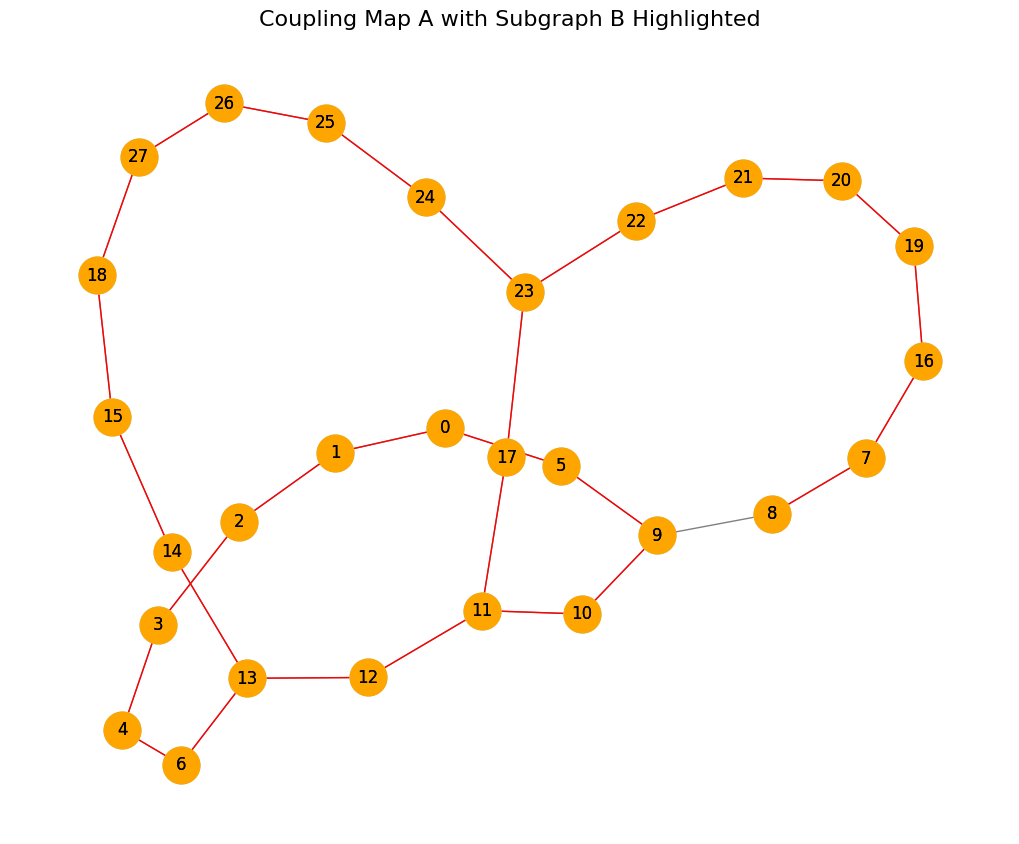

In [76]:
import networkx as nx
import matplotlib.pyplot as plt

# Define two coupling maps as lists of tuples (edges)
# Replace these with your actual coupling maps

# Create graphs
G_a = nx.Graph()
G_a.add_edges_from(coupling_map)

G_b = nx.Graph()
G_b.add_edges_from(combined_coupling_map)

# Get positions for both graphs
pos_a = nx.spring_layout(G_a, seed=42)
pos_b = pos_a  # Use the same layout for consistency

plt.figure(figsize=(10, 8))

# Draw the larger graph (G_a)
nx.draw(G_a, pos_a, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray', font_size=12)

# Draw the subgraph (G_b) with a different color
nx.draw(G_b, pos_b, with_labels=True, node_color='orange', node_size=700, edge_color='red', font_size=12)

# Title and display
plt.title('Coupling Map A with Subgraph B Highlighted', fontsize=16)
plt.axis('off')
plt.show()


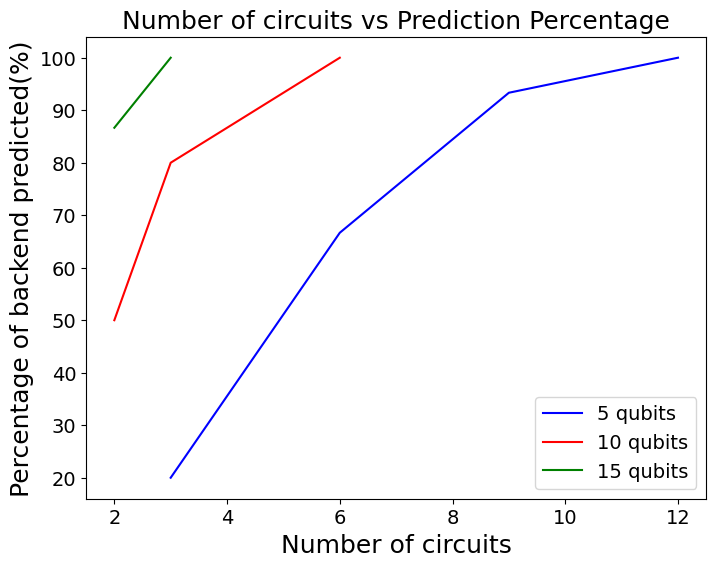

In [145]:
import matplotlib.pyplot as plt

# Data
x_values = [3, 6, 9, 12]  # x-axis points
y_values = [20, 66.66, 93.33, 100]  # y-axis points (percentages)
x_v=[2,3,4,5,6]
y_v=[50,80,86.66,93.33, 100]
x=[2,3]
y=[86.66,100 ]
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values,  linestyle='-', color='b', label='5 qubits')
plt.plot(x_v, y_v,  linestyle='-', color='r', label='10 qubits')
plt.plot(x, y,  linestyle='-', color='g', label='15 qubits')

# Add labels and title
plt.xlabel('Number of circuits', fontsize=18)
plt.ylabel('Percentage of backend predicted(%)', fontsize=18)
plt.title('Number of circuits vs Prediction Percentage', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Show the plot

# Add grid

# Show the plot
plt.show()


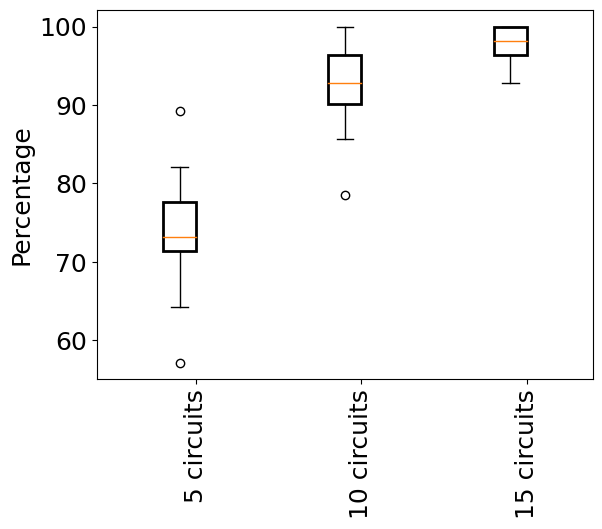

In [1]:
circuit_5 = [23/28, 25/28,20/28,16/28, 20/28, 21/28, 22/28, 21/28, 18/28, 20/28]
circuit_10 = [24/28,27/28,27/28,26/28,25/28,28/28, 28/28, 22/28, 26/28,26/28]
circuit_15 = [28/28,28/28,28/28,28/28,27/28,27/28,27/28,26/28,28/28,27/28]
circuits = []
circuits = [circuit_5, circuit_10, circuit_15]
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

custom_labels = ['5 circuits','10 circuits','15 circuits']
positions = np.arange(1,4)
box_plot= plt.boxplot(circuits, widths=0.2, patch_artist=True, boxprops=dict(linewidth=2))
plt.setp(box_plot['means'], linewidth=2)

    # Customize box colors
#box_plot.set_facecolor('grey')
    # box_plot_noisy['boxes'][0].set_facecolor('grey')
for box in box_plot['boxes']:
    box.set_facecolor('white')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x * 100)))

# Set x-axis ticks and labels
plt.xticks(positions + 0.1, custom_labels,fontsize=18, rotation=90)
plt.yticks(fontsize=18)
#plt.xlabel('Circuits',fontsize=18)
plt.ylabel('Percentage',fontsize=18)
# plt.title('Percentage of backend predicted using circuit pools of varying sizes  ',fontsize=18) 

# Add legend
#plt.legend([box_plot_correct['boxes'][0], box_plot_noisy['boxes'][0]], ['Untouched', 'Infected'],loc='upper right', fontsize=20)

plt.show()
